In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import c
import d
import labels
import portfolio
import signals
import u

# Data Loading

In [3]:
all_data = d.fetch_all("data/future/daily", index_col="Date", parse_dates=["Date"])
data = pd.concat(
    [df["Close/Last"].rename(ticker) for ticker, df in all_data.items()], axis=1
)
data.sort_index(inplace=True)
data.dropna(inplace=True)
data.head()

,CL,ES,NQ
Date,,,
1999-06-22,17.61,1349.3,2242.50
1999-06-23,18.45,1342.3,2259.00
1999-06-24,18.29,1332.8,2218.00
1999-06-25,18.39,1329.0,2214.75
1999-06-28,18.23,1344.0,2263.50


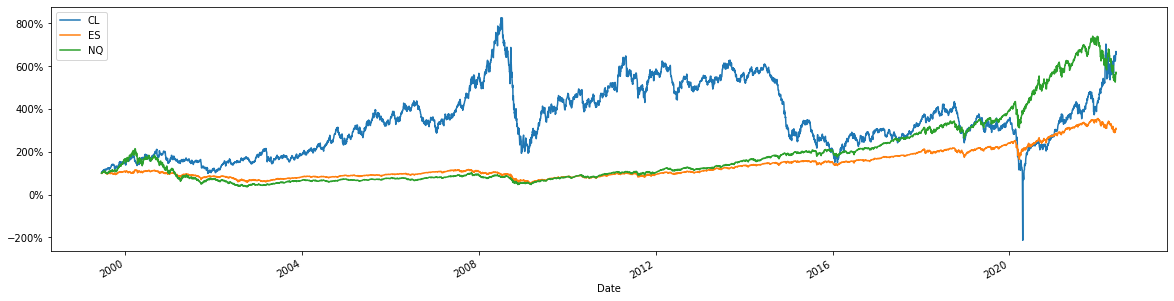

In [4]:
import matplotlib.ticker as mtick

plt.rcParams["figure.figsize"] = (20, 5)

normalized = data.divide(data.iloc[0])
ax = normalized.plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend()

In [5]:
returns = data / data.shift(1)
returns.dropna(inplace=True)

# Brown Durbin Evans Residuals

<AxesSubplot:xlabel='Date'>

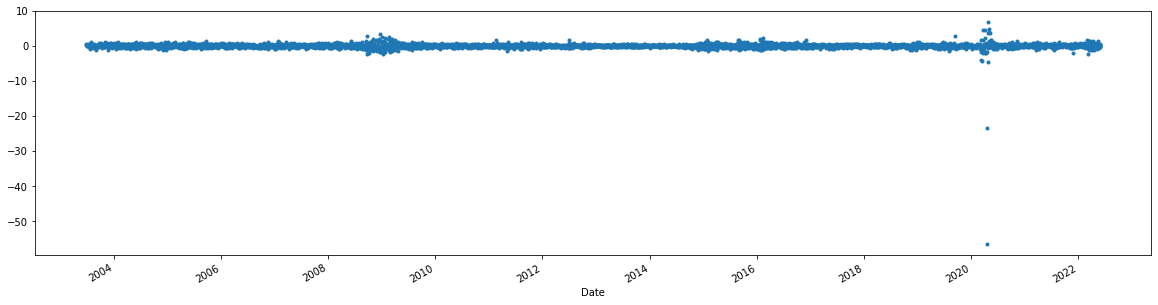

In [6]:
num_residuals = len(data.index) - 1000
bde_residuals = signals.brown_durbin_evans_residuals(
    returns[["ES", "NQ"]], returns["CL"], num_residuals=num_residuals, add_constant=True
)
bde_residuals.plot(style=".")

<AxesSubplot:xlabel='Date'>

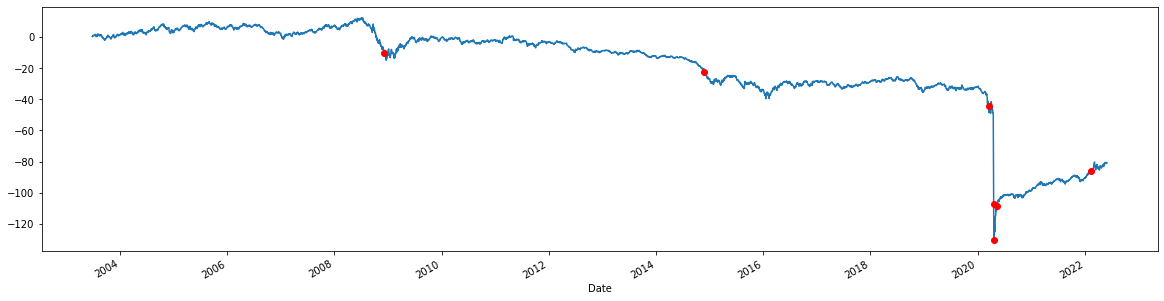

In [7]:
indices = signals.get_cusum_indices(
    bde_residuals, threshold=np.sqrt(num_residuals / 10)
)
cumsum = bde_residuals.cumsum()
cumsum.plot()
(cumsum * indices).replace(0, np.nan).plot(style="o", color="r")

# Chu Stinchcombe White

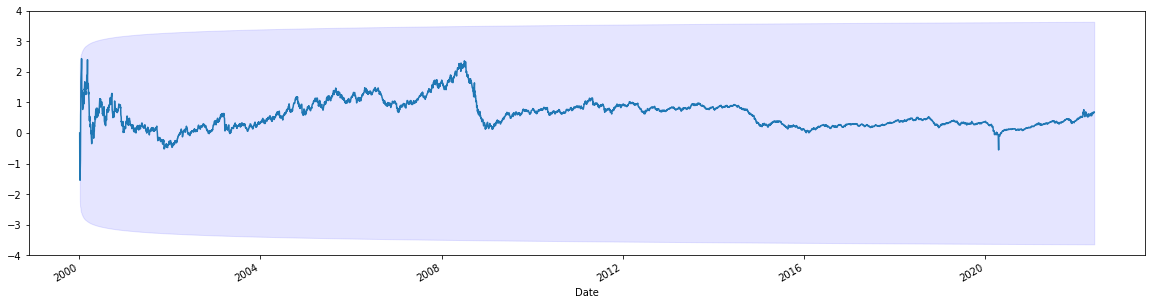

In [110]:
series = data["CL"]
start_index = np.datetime64("2000-01-01")

csw_departure = signals.chu_stinchcombe_white_departure(series, start_index=start_index)
csw_departure.plot()

csw_critical_value = signals.chu_stinchcombe_white_critical_value(
    series, start_index=start_index
)
plt.fill_between(
    csw_critical_value.index,
    csw_critical_value,
    -csw_critical_value,
    interpolate=True,
    color="blue",
    alpha=0.1,
)